PROJECT - Data Cleaning And Insight Generation From Survey Data

OBJECTIVE:
Analyze the Kaggle Data Science Survey dataset to extract meaningful insights about respondents’ demographics, education, and programming habits. The goal is to clean the dataset, handle categorical variables, and visualize key patterns in the data.

LIBRARIES USED: Pandas, Matplotlib

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\ud\Desktop\kaggle_survey_2017_2021.csv", low_memory=False)

print(df.shape)
print(df.head())

(106302, 293)
      - Time from Start to Finish (seconds)                           Q1  \
0  Year               Duration (in seconds)  What is your age (# years)?   
1  2021                                 910                        50-54   
2  2021                                 784                        50-54   
3  2021                                 924                        22-24   
4  2021                                 575                        45-49   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                      India   
2                                  Indonesia   
3                                   Pakistan   
4                 

In [85]:
q7_cols = [c for c in df.columns if c.startswith("Q7_Part")]
q16_cols = [c for c in df.columns if c.startswith("Q16_Part")]

cols = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"] + q7_cols + q16_cols
df_subset = df[cols]
df_subset.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_17
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...
1,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Caret,NaN,NaN,NaN
2,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df_subset = df_subset.rename(columns={
    "Q1": "Age",
    "Q2": "Gender",
    "Q3": "Country",
    "Q4": "Education",
    "Q5": "JobRole",
    "Q6": "Experience"
})
df_subset.head()

,Age,Gender,Country,Education,JobRole,Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_17
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...,Which of the following machine learning framew...
1,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Caret,NaN,NaN,NaN
2,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df_subset = df_subset.fillna("Not Specified")

In [88]:
df_subset["ProgrammingLanguages"] = df_subset[q7_cols].apply(
    lambda row: [x for x in row if x != "Not Specified"], axis=1
)

df_subset["MLFrameworks"] = df_subset[q16_cols].apply(
    lambda row: [x for x in row if x != "Not Specified"], axis=1
)

In [89]:
df_subset.loc[:, "Education"] = df_subset["Education"].str.strip()
df_subset.loc[:, "Education"] = df_subset["Education"].replace({
    "Bachelorâ€™s degree": "Bachelor's degree",
    "Masterâ€™s degree": "Master's degree",
    "Some college/university study without earning a bachelorâ€™s degree":
        "Some college/university study without earning a bachelor's degree",
    "No formal education past high school":
        "I did not complete any formal education past high school"
})
df_subset = df_subset[~df_subset["Education"].isin(["I prefer not to answer", "Not Specified"])]

df_subset.loc[:, "Gender"] = df_subset["Gender"].str.strip().replace({
    "Woman": "Female",
    "Man": "Male"
})        

df_subset.loc[:, "JobRole"] = df_subset["JobRole"].str.strip().replace({
    "Machine Learning Engineer": "ML Engineer"
})
df_subset = df_subset[~df_subset["JobRole"].isin(["I prefer not to answer", "Not Specified"])]

df_subset.loc[:, "Experience"] = df_subset["Experience"].str.strip().replace({
    "< 1 years": "0-1 year",
    "< 1 year": "0-1 year",
    "I have never written code": "No coding experience",
    "I have never written code but I want to learn": "No coding experience",
    "I have never written code and I do not want to learn" : "No coding experience",
    "3 to 5 years": "3-5 years",
    "6 to 10 years": "5-10 years",
    "I don't write code to analyze data": "No coding experience",
    "Less than a year": "0-1 year",
    "More than 10 years": "10-20 years",
    "1 to 2 years": "1-3 years",
    "1-2 years": "1-3 years",
    "20+ years": "20-30 years"
})
df_subset = df_subset[~df_subset["Experience"].isin(["I prefer not to answer", "Not Specified"])]


print("Education:", df_subset["Education"].unique())
print("Job Role:", df_subset["JobRole"].unique())
print("Experience:", df_subset["Experience"].unique())
print("Gender:", df_subset["Gender"].unique())
print("Country:", df_subset["Country"].unique())

Education: ['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'
 "Bachelor's degree" "Master's degree" 'Doctoral degree'
 "Some college/university study without earning a bachelor's degree"
 'I did not complete any formal education past high school'
 'Professional doctorate' 'Professional degree']
Job Role: ['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'
 'Other' 'Program/Project Manager' 'Software Engineer'
 'Research Scientist' 'Student' 'Data Scientist' 'Currently not employed'
 'Data Analyst' 'ML Engineer' 'Business Analyst' 'Data Engineer'
 'Product Manager' 'Statistician' 'Developer Relations/Advocacy'
 'DBA/Database Engineer' 'Product/Project Manager' 'Not employed'
 'Consultant' 'Research Assistant' 'Chief Officer' 'Manager'
 'Developer Advocate' 'Marketing Analyst' 'Principal Investigator'
 'Salesperson' 'Data Journalist' 'Operations Research Practitioner'
 

In [90]:
experience_map = {
    "0-1 year": 0.5,
    "1-3 years": 2,
    "3-5 years": 4,
    "5-10 years": 7.5,
    "10-20 years": 15,
    "20-30 years": 25,
    "30-40 years": 35,
    "40+ years": 45,
    "No coding experience": 0,
    "For how many years have you been writing code and/or programming?": "Midpoint Values"
}

df_subset["Experience_Num"] = df_subset["Experience"].map(experience_map)

print(df_subset[["Experience", "Experience_Num"]].head(10))

                                           Experience   Experience_Num
0   For how many years have you been writing code ...  Midpoint Values
1                                          5-10 years              7.5
2                                         20-30 years               25
3                                           1-3 years                2
4                                         20-30 years               25
5                                            0-1 year              0.5
7                                           1-3 years                2
8                                          5-10 years              7.5
9                                           3-5 years                4
11                                          1-3 years                2


In [91]:
df_subset = df_subset[["Age", "Gender", "Country", "Education", "ProgrammingLanguages", "MLFrameworks", "JobRole", "Experience", "Experience_Num"]]
df_subset.head()

,Age,Gender,Country,Education,ProgrammingLanguages,MLFrameworks,JobRole,Experience,Experience_Num
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,[What programming languages do you use on a re...,[Which of the following machine learning frame...,Select the title most similar to your current ...,For how many years have you been writing code ...,Midpoint Values
1,50-54,Male,India,Bachelor's degree,"[Python, R]","[ Scikit-learn , TensorFlow , Caret ]",Other,5-10 years,7.5
2,50-54,Male,Indonesia,Master's degree,"[SQL, C, C++, Java]",[ Scikit-learn ],Program/Project Manager,20-30 years,25
3,22-24,Male,Pakistan,Master's degree,"[Python, C++, Java]",[],Software Engineer,1-3 years,2
4,45-49,Male,Mexico,Doctoral degree,[Python],"[ Scikit-learn , TensorFlow , Keras ]",Research Scientist,20-30 years,25


In [92]:
non_list_cols = [col for col in df_subset.columns if df_subset[col].apply(lambda x: isinstance(x, list)).sum() == 0]

print("Duplicates before:", df_subset.duplicated(subset=non_list_cols).sum())

df_subset = df_subset.drop_duplicates(subset=non_list_cols)

print("Duplicates after:", df_subset.duplicated(subset=non_list_cols).sum())

Duplicates before: 49249
Duplicates after: 0


In [93]:
df_subset = df_subset.copy()

for col in ["Age", "Gender", "Country", "Education", "JobRole", "Experience"]:
    df_subset.loc[:, col + "_Encoded"], _ = pd.factorize(df_subset[col])

In [94]:
print(df_subset["Age"].value_counts())

Age
25-29                          7526
30-34                          6764
35-39                          5617
22-24                          4882
40-44                          4261
45-49                          3148
18-21                          2553
50-54                          2270
55-59                          1407
60-69                          1159
70+                             303
Not Specified                   174
What is your age (# years)?       1
Name: count, dtype: int64


In [95]:
print(df_subset["Country"].value_counts().head(5))

Country
United States of America    3398
India                       3329
Other                       2179
Brazil                      1454
Russia                      1396
Name: count, dtype: int64


In [96]:
print(df_subset["Gender"].value_counts())

Gender
Male                                                 30204
Female                                                8562
Prefer not to say                                      825
Prefer to self-describe                                170
Nonbinary                                              123
A different identity                                    96
Non-binary, genderqueer, or gender non-conforming       49
Not Specified                                           35
What is your gender? - Selected Choice                   1
Name: count, dtype: int64


In [97]:
print(df_subset["Education"].value_counts())

Education
Master's degree                                                                                                    16231
Bachelor's degree                                                                                                  10707
Doctoral degree                                                                                                     7253
Some college/university study without earning a bachelor's degree                                                   2895
Professional degree                                                                                                 1701
I did not complete any formal education past high school                                                             927
Professional doctorate                                                                                               350
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?        1
Name: count, dtype: in

In [98]:
df_subset.loc[:, "NumLangs"] = df_subset["ProgrammingLanguages"].apply(len)

print(df_subset[["ProgrammingLanguages", "NumLangs"]].head())

                                ProgrammingLanguages  NumLangs
0  [What programming languages do you use on a re...        12
1                                        [Python, R]         2
2                                [SQL, C, C++, Java]         4
3                                [Python, C++, Java]         3
4                                           [Python]         1


In [99]:
df_subset.loc[:, "NumMLF"] = df_subset["MLFrameworks"].apply(len)

print(df_subset[["MLFrameworks", "NumMLF"]].head())

                                        MLFrameworks  NumMLF
0  [Which of the following machine learning frame...      15
1          [  Scikit-learn ,   TensorFlow ,  Caret ]       3
2                                  [  Scikit-learn ]       1
3                                                 []       0
4          [  Scikit-learn ,   TensorFlow ,  Keras ]       3


In [100]:
from collections import Counter

all_langs = Counter([lang for row in df_subset["ProgrammingLanguages"] for lang in row])
print(all_langs.most_common(5))

[('Python', 26573), ('SQL', 14104), ('R', 9014), ('Java', 5556), ('Javascript', 4527)]


In [101]:
all_frameworks = Counter([fw for row in df_subset["MLFrameworks"] for fw in row])
print(all_frameworks.most_common(5))

[('  Scikit-learn ', 14264), ('  TensorFlow ', 9586), (' Keras ', 8534), (' PyTorch ', 6166), (' Xgboost ', 5798)]


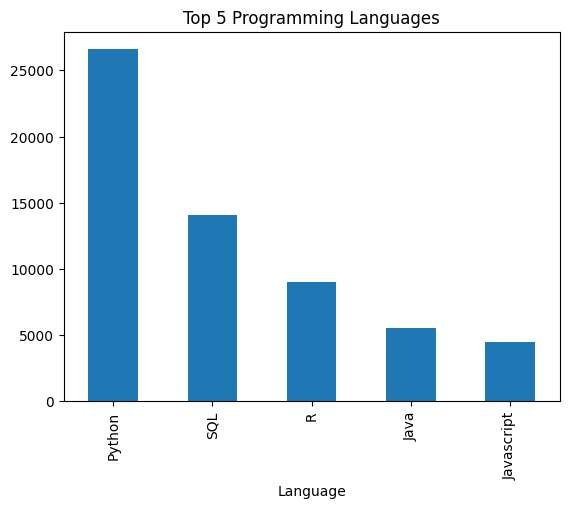

In [102]:
langs_df = pd.DataFrame(all_langs.most_common(5), columns=["Language", "Count"])
langs_df.plot(kind="bar", x="Language", y="Count", legend=False, title="Top 5 Programming Languages")
plt.show()

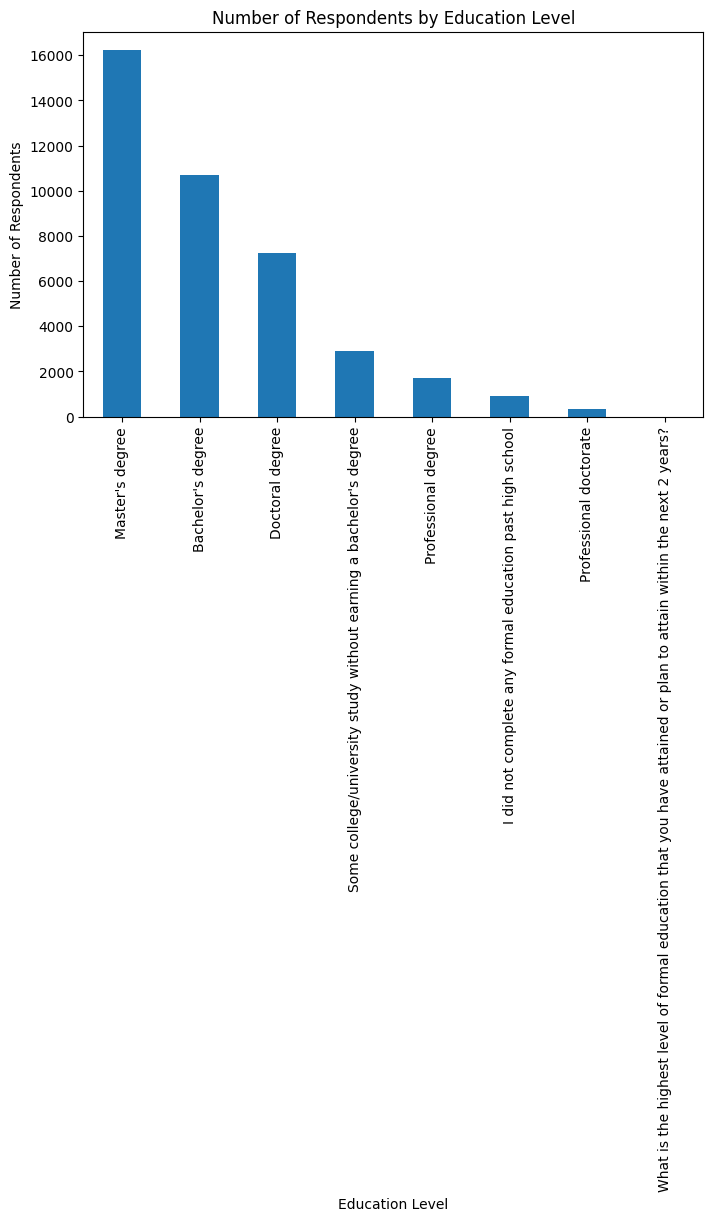

In [103]:
edu_counts = df_subset['Education'].value_counts()
edu_counts.plot(kind='bar', figsize=(8,5))
plt.title("Number of Respondents by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=90)
plt.show()

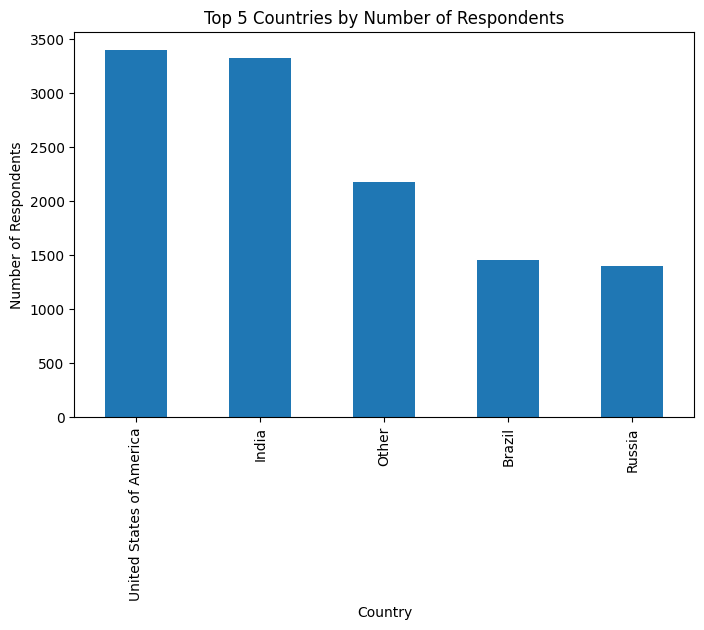

In [104]:
top_countries = df_subset['Country'].value_counts().head(5)  # top 10 countries
top_countries.plot(kind='bar', figsize=(8,5))
plt.title("Top 5 Countries by Number of Respondents")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=90)
plt.show()

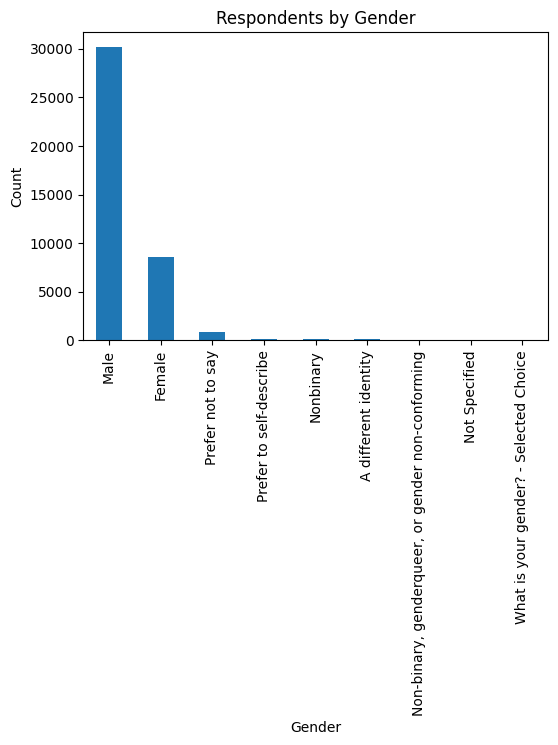

In [105]:
df_subset['Gender'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Respondents by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

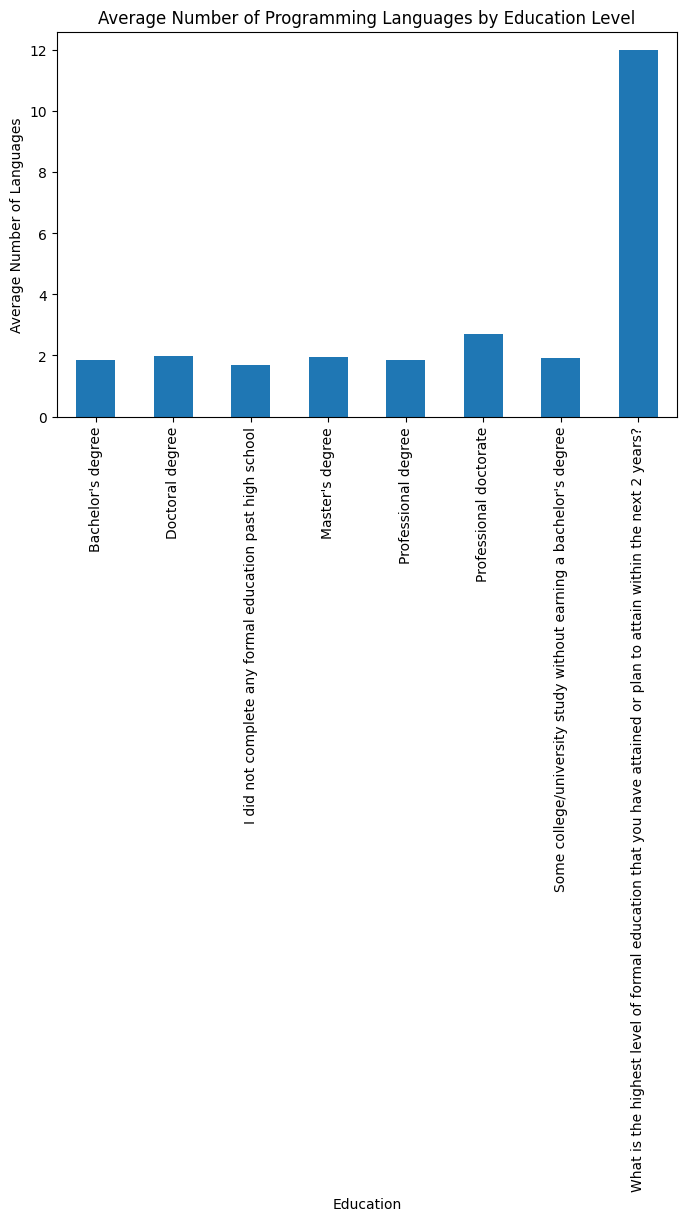

In [106]:
avg_langs = df_subset.groupby("Education")["NumLangs"].mean()
avg_langs.plot(kind='bar', figsize=(8,5))
plt.title("Average Number of Programming Languages by Education Level")
plt.ylabel("Average Number of Languages")
plt.xticks(rotation=90)
plt.show()

In [68]:
# Save to Excel
df_subset.to_excel("Cleaned_survey.xlsx", index=False)
print("File saved as Cleaned_survey.xlsx with encoded columns")

File saved as Cleaned_survey.xlsx with encoded columns
